In [40]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [41]:
#load J1903 pulse data
data = np.load("J1903_data.npy")
freq = np.load("J1903_freqs.npy")
mjds = np.load("J1903_mjds.npy")
chan = np.load("J1903_numchan.npy")

In [42]:
print(np.shape(data))

(56, 64, 2048)


In [43]:
t = np.linspace(0, 2.15, 2048)

Text(0.5, 0, 'Milliseconds')

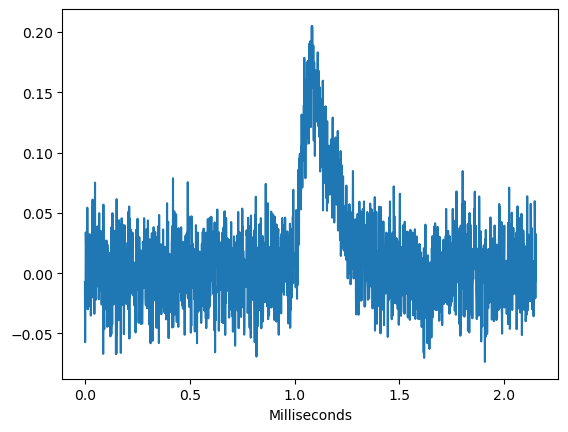

In [44]:
#example profile
data0 = data[0][:int(chan[0])]
data0_1 = data0[1]
plt.plot(t, data0_1)
plt.xlabel('Milliseconds')

0.020703220648431234


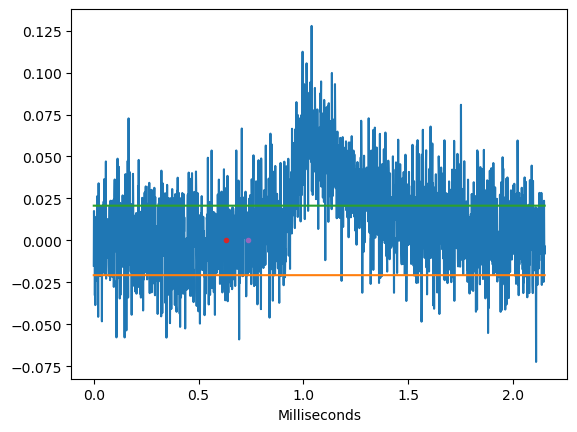

In [68]:
#calculate an example offpulse rms for chi-squared calculation

data_care = data0[40]
rms_collect = 0
for ii in range(600):
    rms_collect += data_care[ii]*data_care[ii]
rms = math.sqrt(rms_collect/600)

z = np.zeros(2048)
z.fill(rms)

y = np.zeros(2048)
y.fill(-rms)

print(rms)
plt.xlabel('Milliseconds')
plt.plot(t, data_care)
plt.plot(t, y)
plt.plot(t, z)
plt.plot(600*2.15/2048, 0, '.')
plt.plot(700*2.15/2048, 0, '.')

In [51]:
rms_list1 = np.zeros(int(chan[0]))
for i in range(int(chan[0])):
    data_care = data0[i]
    rms_collect = 0
    for ii in range(600):
        rms_collect += data_care[ii]*data_care[ii]
    rms = math.sqrt(rms_collect/600)
    rms_list1[i] = rms

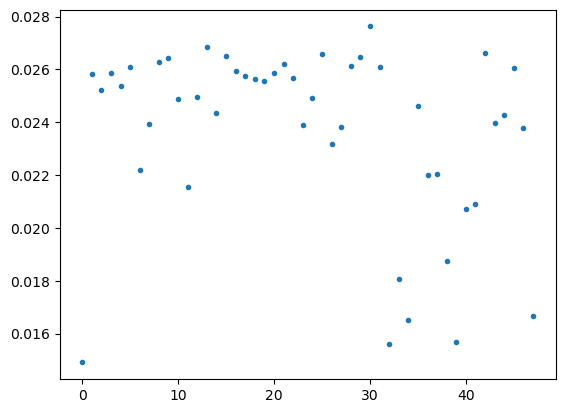

In [52]:
plt.plot(rms_list1, '.')

In [57]:
rms_list2 = np.zeros(int(chan[0]))
for i in range(int(chan[0])):
    data_care = data0[i]
    rms_collect = 0
    for ii in range(700):
        rms_collect += data_care[ii]*data_care[ii]
    rms = math.sqrt(rms_collect/700)
    rms_list2[i] = rms

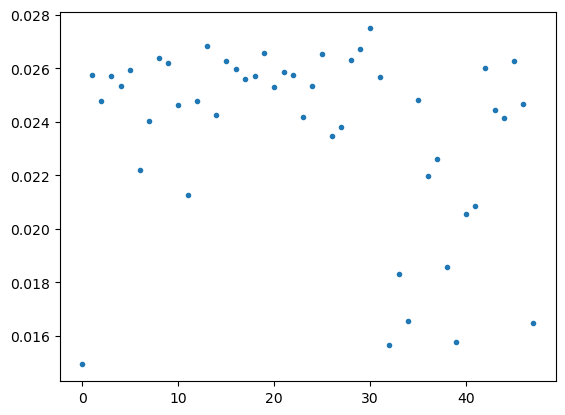

In [58]:
plt.plot(rms_list2, '.')

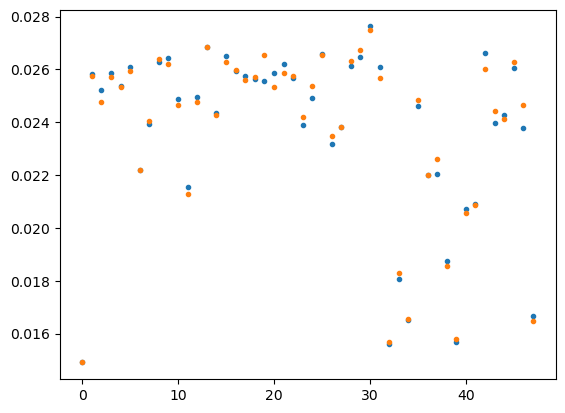

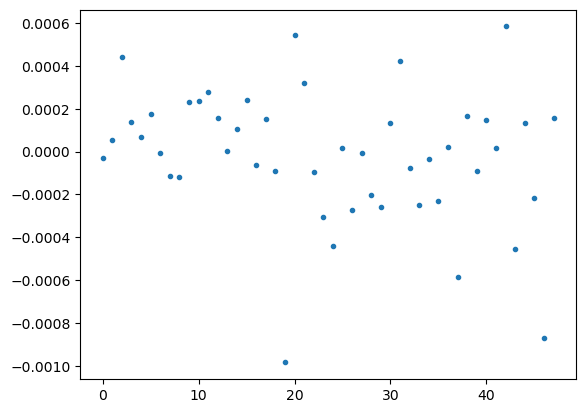

In [62]:
plt.plot(rms_list1,'.')
plt.plot(rms_list2,'.')
plt.show()
plt.plot(np.subtract(rms_list1,rms_list2), '.')
plt.show()

In [64]:
print(np.average(np.subtract(rms_list1, rms_list2)))

-1.803596175506326e-05
